## **Pandas**

In [1]:
# importando as bibliotecas
import pandas as pd

### **Leitura de dados**

In [65]:
pd.read_csv?

In [66]:
# leitura dos dados csv
df = pd.read_csv("https://pycourse.s3.amazonaws.com/temperature.csv")
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [67]:
# leitura de planilhas excel
# 2 abas (worksheets)

# leitura do arquivo todo
excel_file = pd.ExcelFile("https://pycourse.s3.amazonaws.com/temperature.xlsx")

In [68]:
type(excel_file)

pandas.io.excel._base.ExcelFile

In [69]:
# leitura da primeira aba (Sheet1)
# dados numéricos com separador decimal = '.'
df2 = pd.read_excel(excel_file, sheet_name='Sheet1')
df2

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [70]:
# leitura da segunda aba (Sheet2)
# dados numéricos com separador decimal = ','
df3 = pd.read_excel(excel_file, sheet_name='Sheet2', decimal=',')
df3

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [71]:
# visualizando as primeiras n linhas
n = 3
df.head(n)

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente


In [72]:
# visualizando as últimas n linhas
n = 3
df.tail(n)

,date,temperatura,classification
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [73]:
# dtypes
df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [74]:
# estatísticas básicas
df.describe()

,temperatura
count,6.000000
mean,26.800000
std,4.075782
min,20.000000
25%,25.000000
50%,28.250000
75%,28.950000
max,31.200000


In [75]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            6 non-null      object 
 1   temperatura     6 non-null      float64
 2   classification  6 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


In [76]:
# nomes das colunas
df.columns

Index(['date', 'temperatura', 'classification'], dtype='object')

### **Indexação**

In [14]:
df.head()

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel


In [15]:
# seleção de uma coluna
df['temperatura']

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64

In [16]:
# tipo
type(df['temperatura'])

pandas.core.series.Series

In [17]:
# seleção de múltiplas colunas
df[['date', 'classification', 'temperatura']]

,date,classification,temperatura
0,2020-01-01,quente,29.1
1,2020-02-01,muito quente,31.2
2,2020-03-01,quente,28.5
3,2020-04-01,quente,28.0
4,2020-05-01,confortavel,24.0
5,2020-06-01,frio,20.0


In [18]:
# tipo
type(df[['date', 'classification']])

pandas.core.frame.DataFrame

In [19]:
# iloc
df.iloc?

In [20]:
# indexação por índice
# selecionado todas as linhas e a coluna 1
# coluna 1: temperatura
a = df.iloc[:, 1]

In [21]:
# indexação por nome
# selecionado todas as linhas e a coluna 1
df.loc[:, 'temperatura']

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64

In [22]:
# indexação por índice de múltiplas colunas
df.iloc[:, 1:]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


In [23]:
# indexação por nome de múltiplas colunas
df.loc[:, ['temperatura', 'classification']]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


In [24]:
# indexação por nome de múltiplas colunas
df.loc[:, 'temperatura':]

,temperatura,classification
0,29.1,quente
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


### **Indexação booleana**

In [25]:
df

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [26]:
# dtype
df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [27]:
# transformando o tipo da coluna date para datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date              datetime64[ns]
temperatura              float64
classification            object
dtype: object

In [28]:
# setando o índice
df = df.set_index('date')

In [29]:
# visualizando o índice 
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [30]:
# 5 primeiras linas
df.head()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel


In [31]:
# indexação booleana
# seleção de exemplos acima de 25 graus
cond = df['temperatura'] >= 25
df[cond]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [32]:
# indexação booleana considerando datetime
# seleção de entradas até Março de 2020
cond = df.index <= '2020-03-01'
df[cond]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente


In [33]:
# indexação booleana considerando datetime
# seleção de entradas até Março de 2020 e 
# slice na coluna classification
df.loc[df.index <= '2020-03-01', ['classification']]

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


In [34]:
# indexação booleana considerando datetime
# seleção de entradas até Março de 2020 e 
# slice na coluna classification
df.iloc[df.index <= '2020-03-01', [-1]]

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


### **Ordenação**

In [35]:
# df.sort_values
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [36]:
# ordenação crescente por uma coluna
df.sort_values(by='temperatura')

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente


In [37]:
# ordenação crescente por uma coluna
df.sort_values(by='classification')

,temperatura,classification
date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [38]:
# ordenação crescente por mais de uma coluna
df.sort_values(by=['classification', 'temperatura'])

,temperatura,classification
date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
2020-02-01,31.2,muito quente
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente


In [39]:
# ordenação decrescente por uma coluna
df.sort_values(by=['classification', 'temperatura'], ascending=False)

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-02-01,31.2,muito quente
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel


In [40]:
# ordenação crescente pelo índice
df.sort_index()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [41]:
# ordenação decrescente pelo índice
df.sort_index(ascending=False)

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente


### **Visualização**

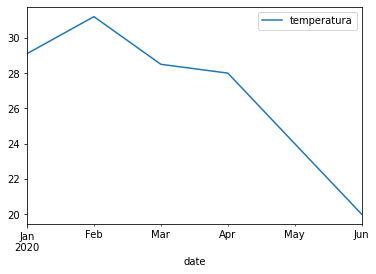

In [42]:
# plot de linhas
df.plot();

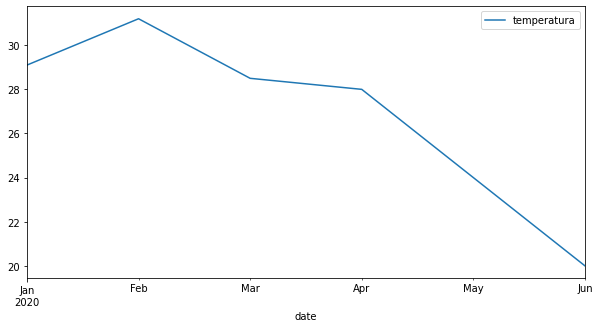

In [43]:
# plot de linhas: tamanho
df.plot(figsize=(10, 5));

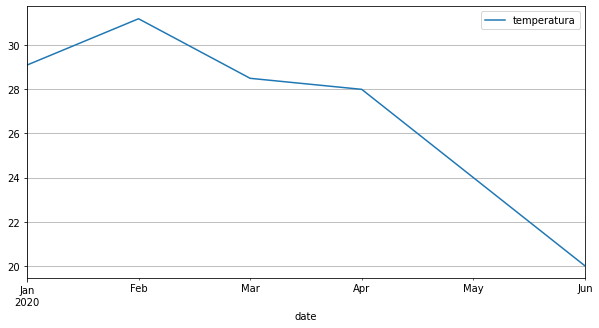

In [44]:
# plot de linhas: grid
df.plot(figsize=(10, 5), grid=True);

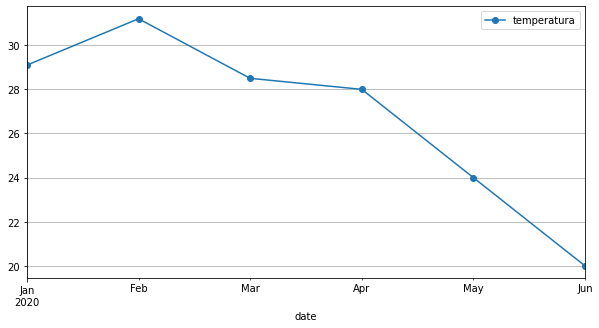

In [45]:
# plot de linhas: style
df.plot(style='-o', figsize=(10, 5), grid=True);
# df.plot(style='--', figsize=(10, 5), grid=True);
# df.plot(style='-.', figsize=(10, 5), grid=True);

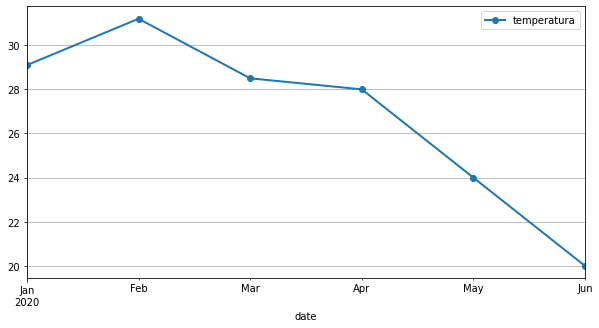

In [46]:
# plot de linhas: linewidth
df.plot(style='-o', linewidth=2, figsize=(10, 5), grid=True);

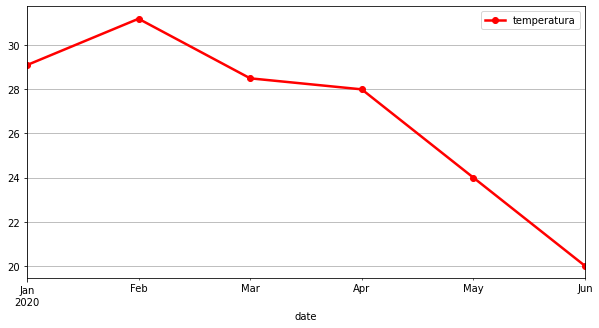

In [47]:
# plot de linhas: color
df.plot(style='-o', linewidth=2.5, color='red', figsize=(10, 5), grid=True);

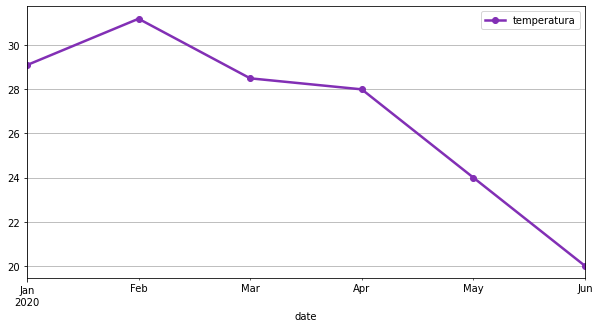

In [48]:
# plot de linhas: color
df.plot(style='-o', linewidth=2.5, color='#822fb5', figsize=(10, 5), grid=True);

In [49]:
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


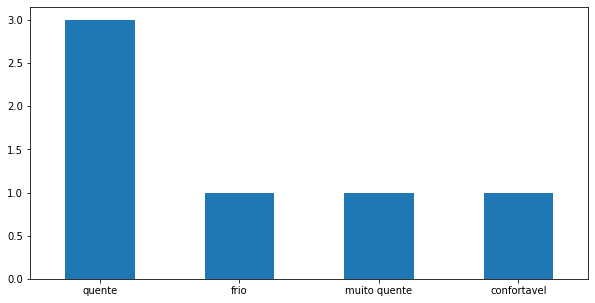

In [50]:
# plot de barras
df['classification'].value_counts().plot.bar(figsize=(10, 5),
                                             rot=0);

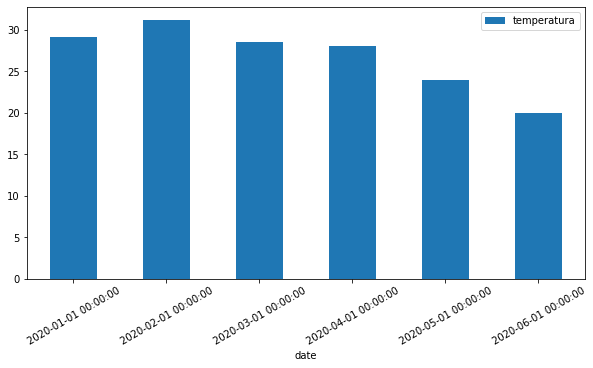

In [51]:
# plot de barras
df.plot(kind='bar', figsize=(10, 5), rot=30);

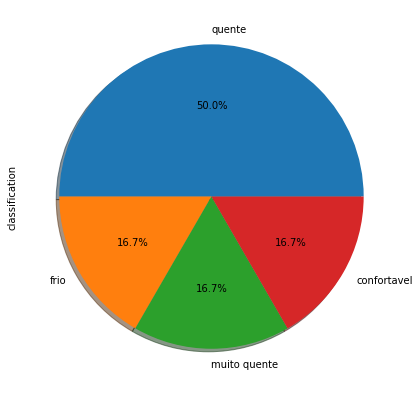

In [52]:
# pie plot
df['classification'].value_counts().plot.pie(autopct='%1.1f%%',
                                             shadow=True,
                                             figsize=(10, 7));

### **Outras operações úteis no pandas**

In [53]:
# dataframe
df.head(6)

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [77]:
# groupby: agrupamento por valores únicos de uma ou mais colunas
df.groupby(by='classification')

In [78]:
# groupby: agrupamento por valores únicos de uma ou mais colunas
df.groupby(by='classification').mean()

,temperatura
classification,
confortavel,24.000000
frio,20.000000
muito quente,31.200000
quente,28.533333


In [56]:
# groupby: agrupamento por valores únicos de uma ou mais colunas
df.groupby(by='classification').sum()

,temperatura
classification,
confortavel,24.0
frio,20.0
muito quente,31.2
quente,85.6


In [57]:
# drop: remoção de uma coluna
df.drop('temperatura', axis=1)

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
2020-06-01,frio


In [58]:
df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [59]:
# cópia de um dataframe: evita compartilhamento de memória
# sem copy(), operações inplace em df2 também alteram df
# df2 = df.copy() 
df2 = df

In [60]:
# argumento inplace
# inplace=True aplica a transformação no próprio objeto
df3 = df2.drop("temperatura", axis=1)

In [61]:
# sem inplace, df2 continua o mesmo
df3.head()

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel


In [62]:
# argumento inplace
# inplace=True aplica a transformação no próprio objeto
df2.drop("temperatura", axis=1, inplace=True)

In [63]:
# com inplace, df2 é alterado
df2.head()

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel


In [64]:
# df
df.head()

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
